In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage.io import imsave, imread


In [14]:

image_file = Image.open("01.png") # open colour image
image_file = image_file.convert('L') # convert image to black and white
image_file.save('01_black.jpg')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


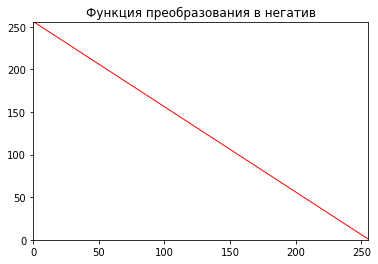

In [15]:

# Load the image

def neg_plot():
    x=np.arange(0,256,0.01)
    y=np.arange(256,0,-0.01)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция преобразования в негатив')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

img = Image.open("01_black.jpg")


# Display the original image

# img.show()

# Read pixels and apply negative transformation

for i in range(0, img.size[0]-1):

    for j in range(0, img.size[1]-1):

        # Get pixel value at (x,y) position of the image

        pixelColorVals = img.getpixel((i,j))

        # Invert color

        Pixel    = 255 - pixelColorVals # Negate red pixel


        # Modify the image with the inverted pixel values

        img.putpixel((i,j),Pixel)

neg_plot()
# Display the negative image

img.save("01_neg.jpg", "JPEG")

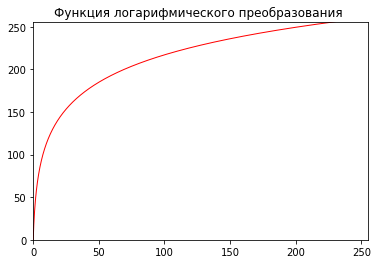

C:\Temp/ipykernel_6300/2942240338.py:13: RuntimeWarning: divide by zero encountered in log
  output=c*np.log(1+img)


True

In [38]:

 
 # Рисование кривой
def log_plot(c):
    x=np.arange(0,256,0.01)
    y=c*np.log(1+x)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция логарифмического преобразования ')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

 # Логарифмическое преобразование
def log(c,img):
    output=c*np.log(1+img)
    output=np.uint8(output+0.5)
    return output

# Прочитать исходное изображение
img=cv2.imread('02_black.jpg')

# Нарисуйте кривую логарифмического преобразования
log_plot(47)
 # Логарифмическое преобразование шкалы серого изображения
output=log(47,img)

# Показать изображение
# cv2.imshow('Input',img)
# cv2.imshow('Output',output)
cv2.imwrite('02_log_1.jpg', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


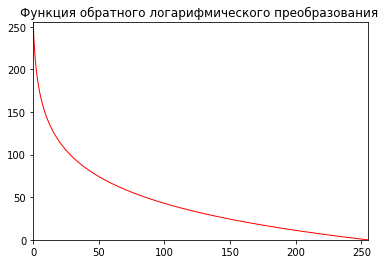

True

In [32]:

 
 # Рисование кривой
def log_plot2(c):
    x=np.arange(0,256,0.01)
    y=255-c*np.log(1+x)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция обратного логарифмического преобразования ')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

 # Логарифмическое преобразование
def log2(c,img):
    output = 2.71 ** (img / c) - 1
    output = np.uint8(output + 0.5)
    return output

# Прочитать исходное изображение
img=cv2.imread('02_black.jpg')

# Нарисуйте кривую логарифмического преобразования
log_plot2(46)
 # Логарифмическое преобразование шкалы серого изображения
output=log2(47,img)

# Показать изображение
# cv2.imshow('Input',img)
# cv2.imshow('Output',output)
cv2.imwrite('02_log_2.jpg', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

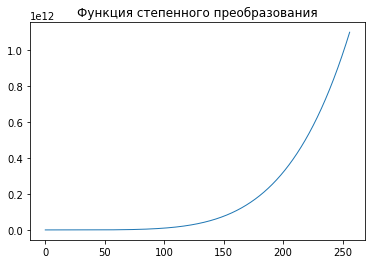

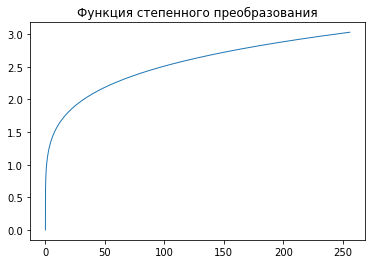

In [30]:

float_01 = img_as_float(Image.open('01_black.jpg'))
float_02 = img_as_float(Image.open('02_black.jpg'))

img_01_deg_x = exposure.adjust_gamma(float_01, 5)
img_02_deg_x = exposure.adjust_gamma(float_02, 5)

img_01_deg_y = exposure.adjust_gamma(float_01, 0.2)
img_02_deg_y = exposure.adjust_gamma(float_02, 0.2)

imsave('01_deg_1.jpg', (img_01_deg_x * 255).astype(np.uint8))
imsave('02_deg_1.jpg', (img_02_deg_x * 255).astype(np.uint8))
imsave('01_deg_2.jpg', (img_01_deg_y * 255).astype(np.uint8))
imsave('02_deg_2.jpg', (img_02_deg_y * 255).astype(np.uint8))

def gamma_plot(c):
     x = np.arange(0, 256, 0.01)
     y = x**c
     plt.plot(x, y, linewidth=1)
     plt.title(u'Функция степенного преобразования')
     plt.show()

gamma_plot(5)
gamma_plot(0.2)


In [30]:
import cv2
import numpy as np

# Функция для отображения каждого уровня интенсивности на выходной уровень интенсивности.

def pixelVal(pix, r1, s1, r2, s2):

    if (0 <= pix and pix <= r1):

        return (s1 / r1)*pix

    elif (r1 < pix and pix <= r2):

        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1

    else:

        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Откройте изображение.

img = cv2.imread('02_black.jpg')

# Определить параметры.

r1 = 70

s1 = 0

r2 = 140

s2 = 255

# Векторизовать функцию, чтобы применить ее к каждому значению в массиве Numpy.

pixelVal_vec = np.vectorize(pixelVal)

  
# Применить контрастное растяжение.

contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

  
# Сохранить отредактированное изображение.

cv2.imwrite('02_sl.jpg', contrast_stretched)

True

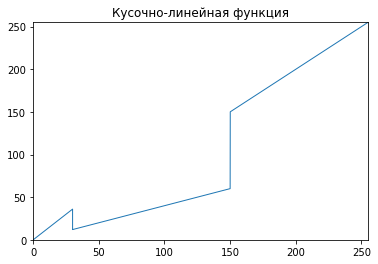

In [11]:
from PIL import Image

def plot_img_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

def draw_graphics(image, image_corrected, image_title, correction_title):
    plt.figure(figsize=(13, 9))
    axes = np.zeros((2, 2), dtype=object)
    axes[0, 0] = plt.subplot(2, 2, 1)
    axes[0, 1] = plt.subplot(2, 2, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[1, 0] = plt.subplot(2, 2, 3)
    axes[1, 1] = plt.subplot(2, 2, 4)

    plot_img_and_hist(image, axes[:, 0])[0].set_title(image_title)
    plot_img_and_hist(image_corrected, axes[:, 1])[0].set_title(correction_title)
 
def piecewise_linear_transformation(image):
    img_gray = cv2.imread(image, flags=0)  # flags=0  Read as grayscale image

    height, width = img_gray.shape[:2]

    img_stretch = np.empty((height, width), np.uint8)
    #  Create a blank array
    k1 = 1.3  # imgGray[h,w] < r1:
    k2 = 1  # r1 <= imgGray[h,w] <= r2
    k3 = 0.5  # imgGray[h,w] > r2
    for h in range(height):
        for w in range(width):
            #print(f'{h} {w}')
            if img_gray[h, w] < 30:
                img_stretch[h, w] = k1 * img_gray[h, w]
            elif 30 <= img_gray[h, w] <= 150:
                img_stretch[h, w] = k2 * (img_gray[h, w])
            elif img_gray[h, w] > 150:
                img_stretch[h, w] = k3 * (img_gray[h, w])

    # draw_graphics(img_gray, img_stretch, 'Image', 'Image with piecewise linear transformation')
    return img_stretch

def piecewise_plot():
     x = np.arange(0, 256, 0.01)
     func = lambda t: t*1.2 if t < 30 else t * 0.4 if 30 <= t <= 150 else t* 1
     vfunc = np.vectorize(func)
     y = vfunc(x.copy())
     plt.plot(x, y, linewidth=1)

     plt.title(u'Кусочно-линейная функция')
     plt.xlim(0, 255), plt.ylim(0, 255)
     plt.show()
 
img_01_sl = piecewise_linear_transformation('01_black.jpg')
img_02_sl = piecewise_linear_transformation('02_black.jpg')
piecewise_plot()

imsave('01_sl.jpg', img_01_sl)
imsave('02_sl.jpg', img_02_sl)